In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#pour calculer les erreurs
from sklearn.metrics import mean_squared_error

In [17]:
columns = ['longitude', 'latitude', 'housing_median_age','total_rooms','total_bedrooms',
           'population','households','median_income','median_house_value','ocean_proximity']
try:
    df = pd.read_csv('housing.csv', usecols=columns, sep=',')
    print(df)
except FileNotFoundError:
    print('fichier non exist')
    exit()

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [19]:
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [21]:
x = df['median_income'].values.reshape(-1,1)
y = df['median_house_value'].values

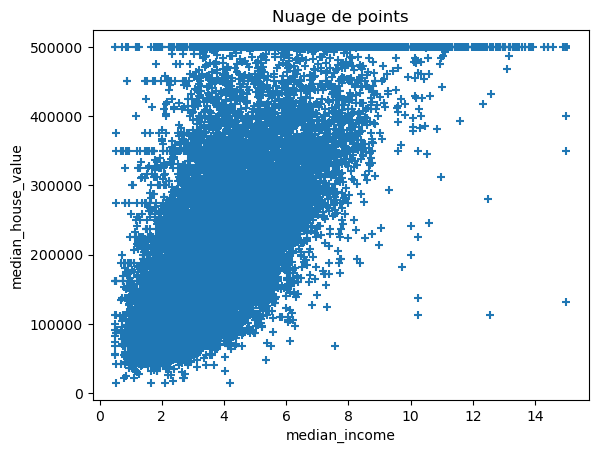

In [23]:
plt.scatter(x,y,marker='+')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.title('Nuage de points')
plt.show()

RMSE:84209.01241414454


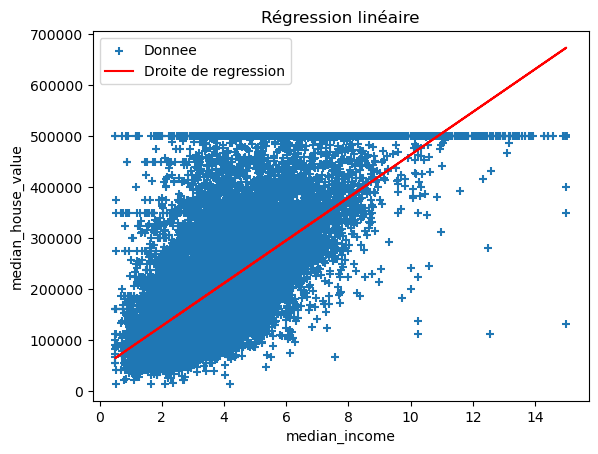

In [25]:
#Division des données en ensembles d'entraînement (80%) et de test (20%).
#Utilisation de la librairie scikit-learn pour créer un modèle de régression linéaire.x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=42)
model= LinearRegression()
model.fit(x_train , y_train)

y_pred = model.predict(x_test)

#Calcul de l'erreur quadratique moyenne (RMSE) sur l'ensemble de test pour évaluer la performance du modèle.
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"RMSE:{rmse}")

plt.scatter(x,y ,label='Donnee',marker='+')
plt.plot(x,model.predict(x), color = 'red' , label= 'Droite de regression')
plt.xlabel('median_income')
plt.ylabel('median_house_value')

plt.title('Régression linéaire')
plt.legend()
plt.show()

In [27]:
print(f"Equation de la droite : median_house_value = {model.coef_[0]: .2f} * median_income + {model.intercept_:.2f}")
print("la pente indique que pour chaque median_income , median_house_value aug d'environ", model.coef_[0])

Equation de la droite : median_house_value =  41933.85 * median_income + 44459.73
la pente indique que pour chaque median_income , median_house_value aug d'environ 41933.8493938127
